In [1]:
%%bash 
ls ../sptial_layer_to_produce_tool/

ETH_DEM30m.tfw
ETH_DEM30m.tif
ppt32.tfw
ppt32.tif
ppt32.tif.aux.xml
ppt32.tif.ovr
ppt32.tif.xml
Slope_perc_int.tif
Slope_perc_int.tif.aux.xml
TAXOUSDA_250m.tif
Technology decision tool.xlsx


In [1]:
import rasterio as rio
from rasterio.plot import show
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
import rasterio.features as rioFeatures
import rasterio.warp as rioWarp

In [3]:
import folium

In [4]:
def get_GeoJSON_shape(tagged_image_file, coord_ref_sys = "EPSG:4326"):
    mask = tagged_image_file.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rioFeatures.shapes(
            mask, transform=tagged_image_file.transform):
        geom = rioWarp.transform_geom(tagged_image_file.crs, coord_ref_sys, geom, precision=6)
        return geom

##### Elevation Layer

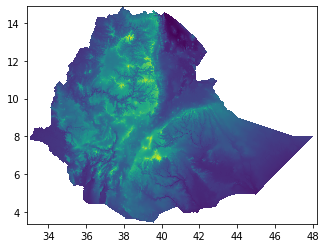

driver :  GTiff
dtype :  int16
nodata :  32767.0
width :  8370
height :  6284
count :  1
crs :  EPSG:4326
transform :  | 0.00, 0.00, 32.86|
| 0.00,-0.00, 14.89|
| 0.00, 0.00, 1.00|
blockxsize :  128
blockysize :  128
tiled :  True
interleave :  band
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 32767.0, 'width': 8370, 'height': 6284, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00183398290804968, 0.0, 32.8599563221203,
       0.0, -0.00183398290804968, 14.888557329617818)}


In [5]:
try:
    elevation_layer = rio.open("../sptial_layer_to_produce_tool/ETH_DEM30m.tif")
    show(elevation_layer)
    for attr in elevation_layer.profile.keys():
        print(attr,": ",elevation_layer.profile[attr])
    print(elevation_layer.meta)
except:
    print("File not found")

In [6]:
elevation_layer.crs

CRS.from_epsg(4326)

In [7]:
metadata_elevation_layer = pd.DataFrame.from_dict(data = {attr : elevation_layer.profile[attr] for attr in elevation_layer.profile.keys()}, orient = "index").transpose()
metadata_elevation_layer["crs"] = str(elevation_layer.profile["crs"])
metadata_elevation_layer.insert(1, "coordinate", get_GeoJSON_shape(elevation_layer, coord_ref_sys = elevation_layer.crs)["coordinates"])
metadata_elevation_layer.insert(0, "name", "Elevation Layer", True)
metadata_elevation_layer

name driver                                         coordinate  \
0  Elevation Layer  GTiff  [[42.394833, 12.480538], [42.394833, 12.478704...   

   dtype nodata width height count        crs  \
0  int16  32767  8370   6284     1  EPSG:4326   

                                           transform blockxsize blockysize  \
0  (0.00183398290804968, 0.0, 32.8599563221203, 0...        128        128   

  tiled interleave  
0  True       band

In [8]:

metadata_elevation_layer = metadata_elevation_layer.assign(coordinates = get_GeoJSON_shape(elevation_layer, coord_ref_sys=elevation_layer.crs)["coordinates"])


##### Precipitation Layer

In [9]:
try:
    precipitation_layer = rio.open("../sptial_layer_to_produce_tool/ppt32.tif")
    for attr in precipitation_layer.profile.keys():
        print(attr,": ",precipitation_layer.profile[attr])
except:
    print("File not found")

driver :  GTiff
dtype :  int16
nodata :  0.0
width :  1795
height :  1373
count :  12
crs :  EPSG:4326
transform :  | 0.01, 0.00, 33.00|
| 0.00,-0.01, 14.84|
| 0.00, 0.00, 1.00|
blockxsize :  128
blockysize :  128
tiled :  True
interleave :  pixel


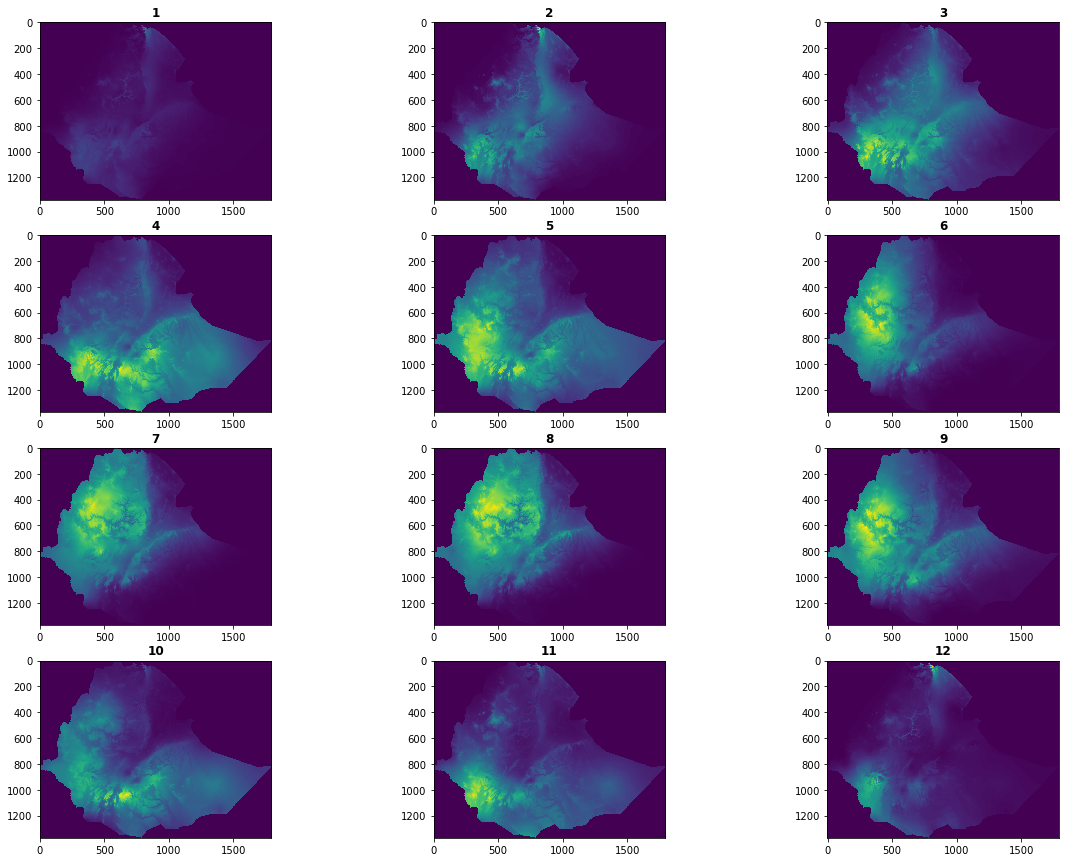

In [11]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize=(20, 15))

show(precipitation_layer.read(1), ax = axes[0][0], title = "1")
show(precipitation_layer.read(2), ax = axes[0][1], title = "2")
show(precipitation_layer.read(3), ax = axes[0][2], title = "3")

show(precipitation_layer.read(4), ax = axes[1][0], title = "4")
show(precipitation_layer.read(5), ax = axes[1][1], title = "5")
show(precipitation_layer.read(6), ax = axes[1][2], title = "6")

show(precipitation_layer.read(7), ax = axes[2][0], title = "7")
show(precipitation_layer.read(8), ax = axes[2][1], title = "8")
show(precipitation_layer.read(9), ax = axes[2][2], title = "9")

show(precipitation_layer.read(10), ax = axes[3][0], title = "10")
show(precipitation_layer.read(11), ax = axes[3][1], title = "11")
show(precipitation_layer.read(12), ax = axes[3][2], title = "12");

In [10]:
metadata_precipitation_layer = pd.DataFrame.from_dict(data = {attr : precipitation_layer.profile[attr] for attr in precipitation_layer.profile.keys()}, orient = "index").transpose()
metadata_precipitation_layer["crs"] = str(precipitation_layer.profile["crs"])
metadata_precipitation_layer.insert(1, "coordinate", get_GeoJSON_shape(precipitation_layer, coord_ref_sys = precipitation_layer.crs)["coordinates"])
metadata_precipitation_layer.insert(0, "name", "Precipitation Layer", True)
metadata_precipitation_layer

name driver  \
0  Precipitation Layer  GTiff   

                                          coordinate  dtype nodata width  \
0  [[32.999915, 14.841697], [32.999915, 7.941699]...  int16      0  1795   

  height count        crs                                          transform  \
0   1373    12  EPSG:4326  (0.008333329999999998, 0.0, 32.9999148, 0.0, -...   

  blockxsize blockysize tiled interleave  
0        128        128  True      pixel

driver :  GTiff
dtype :  float64
nodata :  -9e+33
width :  300
height :  230
count :  1
crs :  EPSG:4326
transform :  | 0.05, 0.00, 32.95|
| 0.00,-0.05, 14.90|
| 0.00, 0.00, 1.00|
blockxsize :  128
blockysize :  128
tiled :  True
compress :  lzw
interleave :  band


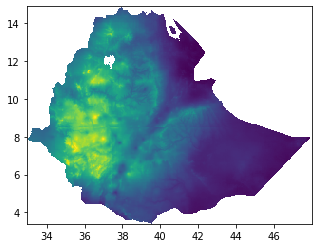

In [11]:
try:
    annual_precip_layer = rio.open(r"../sptial_layer_to_produce_tool/Prcip_Annual.tif")
    for attr in annual_precip_layer.profile.keys():
        print(attr,": ",annual_precip_layer.profile[attr])
    show(annual_precip_layer)
except:
    print("File not found")

In [12]:
metadata_annual_precipitation_layer = pd.DataFrame.from_dict(data = {attr : annual_precip_layer.profile[attr] for attr in annual_precip_layer.profile.keys()}, orient = "index").transpose()
metadata_annual_precipitation_layer["crs"] = str(annual_precip_layer.profile["crs"])
metadata_annual_precipitation_layer.insert(1, "coordinate", get_GeoJSON_shape(annual_precip_layer, coord_ref_sys = annual_precip_layer.crs)["coordinates"])
metadata_annual_precipitation_layer.insert(0, "name", "Annual Precipitation Layer", True)
metadata_annual_precipitation_layer

name driver  \
0  Annual Precipitation Layer  GTiff   

                                          coordinate    dtype nodata width  \
0  [[39.220784, 14.599989], [39.220784, 14.549989...  float64 -9e+33   300   

  height count        crs                                          transform  \
0    230     1  EPSG:4326  (0.050164968660562345, 0.0, 32.9501626798422, ...   

  blockxsize blockysize tiled compress interleave  
0        128        128  True      lzw       band

##### Topographic Slope Layer

In [13]:
try:
    topographic_slope_layer = rio.open("../sptial_layer_to_produce_tool/Slope_perc_int.tif")
#     show(topographicSlopeLayer)
    for attr in topographic_slope_layer.profile.keys():
        print(attr,": ",topographic_slope_layer.profile[attr])
except:
    print("File not found")

driver :  GTiff
dtype :  uint16
nodata :  None
width :  53596
height :  41323
count :  1
crs :  EPSG:32637
transform :  | 31.10, 0.00,-167562.62|
| 0.00,-31.10, 1660735.06|
| 0.00, 0.00, 1.00|
tiled :  False
interleave :  band


In [14]:
metadata_topographic_slope_layer = pd.DataFrame.from_dict(data = {attr : topographic_slope_layer.profile[attr] for attr in topographic_slope_layer.profile.keys()}, orient = "index").transpose()
metadata_topographic_slope_layer["crs"] = str(topographic_slope_layer.profile["crs"])
metadata_topographic_slope_layer.insert(1, "coordinate", get_GeoJSON_shape(topographic_slope_layer, coord_ref_sys=topographic_slope_layer.crs)["coordinates"])
metadata_topographic_slope_layer.insert(0, "name", "Topographic Slope Layer", True)
metadata_topographic_slope_layer

name driver  \
0  Topographic Slope Layer  GTiff   

                                          coordinate   dtype nodata  width  \
0  [[-167562.6226, 1660735.0593], [-167562.6226, ...  uint16   None  53596   

  height count         crs                                          transform  \
0  41323     1  EPSG:32637  (31.09831804798866, 0.0, -167562.6226, 0.0, -3...   

   tiled interleave  
0  False       band

##### Soil Texture Type Layer

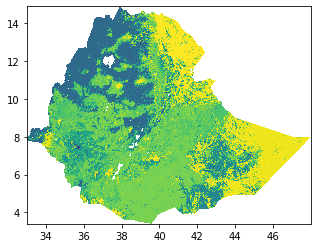

driver :  GTiff
dtype :  uint8
nodata :  255.0
width :  1800
height :  1380
count :  1
crs :  EPSG:4326
transform :  | 0.01, 0.00, 32.99|
| 0.00,-0.01, 14.90|
| 0.00, 0.00, 1.00|
tiled :  False
interleave :  band


In [15]:
try:
    soil_texture_layer = rio.open("../sptial_layer_to_produce_tool/TAXOUSDA_1km_Ethiopia.tiff")
    show(soil_texture_layer)
    for attr in soil_texture_layer.profile.keys():
        print(attr,": ",soil_texture_layer.profile[attr])
except:
    print("File not found")

In [16]:
metadata_soil_texture_layer = pd.DataFrame.from_dict(data = {attr : soil_texture_layer.profile[attr] for attr in soil_texture_layer.profile.keys()}, orient = "index").transpose()
metadata_soil_texture_layer["crs"] = str(soil_texture_layer.profile["crs"])
metadata_soil_texture_layer.insert(1, "coordinate", get_GeoJSON_shape(soil_texture_layer, coord_ref_sys = soil_texture_layer.crs)["coordinates"])
metadata_soil_texture_layer.insert(0, "name", "Soil Texture Layer", True)
metadata_soil_texture_layer

name driver  \
0  Soil Texture Layer  GTiff   

                                          coordinate  dtype nodata width  \
0  [[39.15, 14.649167], [39.15, 14.640834], [39.1...  uint8    255  1800   

  height count        crs                                          transform  \
0   1380     1  EPSG:4326  (0.00833333333333, 0.0, 32.9916666669148, 0.0,...   

   tiled interleave  
0  False       band

In [18]:
Land_Mangement_Metadata = pd.concat([metadata_elevation_layer, metadata_annual_precipitation_layer, metadata_soil_texture_layer, metadata_topographic_slope_layer], sort = False, ignore_index = True).drop(columns=["coordinates"])
Land_Mangement_Metadata

name driver  \
0             Elevation Layer  GTiff   
1  Annual Precipitation Layer  GTiff   
2          Soil Texture Layer  GTiff   
3     Topographic Slope Layer  GTiff   

                                          coordinate    dtype nodata  width  \
0  [[42.394833, 12.480538], [42.394833, 12.478704...    int16  32767   8370   
1  [[39.220784, 14.599989], [39.220784, 14.549989...  float64 -9e+33    300   
2  [[39.15, 14.649167], [39.15, 14.640834], [39.1...    uint8    255   1800   
3  [[-167562.6226, 1660735.0593], [-167562.6226, ...   uint16   None  53596   

  height count         crs                                          transform  \
0   6284     1   EPSG:4326  (0.00183398290804968, 0.0, 32.8599563221203, 0...   
1    230     1   EPSG:4326  (0.050164968660562345, 0.0, 32.9501626798422, ...   
2   1380     1   EPSG:4326  (0.00833333333333, 0.0, 32.9916666669148, 0.0,...   
3  41323     1  EPSG:32637  (31.09831804798866, 0.0, -167562.6226, 0.0, -3...   

  blockxsize blockysize  tiled interleave compress  
0        128        128   True       band      NaN  
1        128        128   True       band      lzw  
2        NaN        NaN  False       band      NaN  
3        NaN        NaN  False       band      NaN

In [19]:
Land_Mangement_Metadata.to_csv("Land_Management_Files_Metadata.csv", header=True)

### Vis

In [20]:
from shapely.geometry import MultiPolygon, Polygon

In [21]:
def polygon_from_coordinates(coordinates):
    longitude_points = [point[0] for point in coordinates[0]]
    latitude_points = [point[1] for point in coordinates[0]]
    return Polygon(zip(longitude_points, latitude_points))

In [22]:
from folium import plugins

In [23]:
import gdal

In [25]:
el = gdal.Open("../sptial_layer_to_produce_tool/ETH_DEM30m.tif")
pr = gdal.Open("../sptial_layer_to_produce_tool/Prcip_Annual.tif")
soil = gdal.Open("../sptial_layer_to_produce_tool/TAXOUSDA_1km_Ethiopia.tiff")

In [28]:
el.GetGeoTransform()

(32.8599563221203,
 0.00183398290804968,
 0.0,
 14.888557329617818,
 0.0,
 -0.00183398290804968)

In [26]:
eth_map = folium.Map(location = [9.05, 38.76], zoom_start = 5)
# folium.LatLngPopup().add_to(eth_map)
folium.raster_layers.ImageOverlay(image = el.ReadAsArray(), 
                                  bounds = [[elevation_layer.bounds.bottom, elevation_layer.bounds.left],[elevation_layer.bounds.top, elevation_layer.bounds.right]],
                                  colormap = lambda x: (1, x, x, x),
                                  origin = "upper",
                                  mercator_project = True,
                                 ).add_to(eth_map)
eth_map

In [31]:
eth_map = folium.Map(location = [9.05, 38.76], zoom_start = 5)
folium.raster_layers.ImageOverlay(image = pr.ReadAsArray(), 
                                  bounds = [[precipitation_layer.bounds.bottom, precipitation_layer.bounds.left],[precipitation_layer.bounds.top, precipitation_layer.bounds.right]],
                                  colormap = lambda x: (x, x, x, 0.5),
                                  origin = "upper",
                                  mercator_project = True,
                                 ).add_to(eth_map)
eth_map

In [30]:
eth_map = folium.Map(location = [9.05, 38.76], zoom_start = 5)
folium.raster_layers.ImageOverlay(image = soil.ReadAsArray(), 
                                  bounds = [[soil_texture_layer.bounds.bottom, soil_texture_layer.bounds.left],[soil_texture_layer.bounds.top, soil_texture_layer.bounds.right]],
                                  colormap = lambda x: (x, x, x, x),
                                  opacity = 1,
                                  origin = "upper",
                                  mercator_project = True,
                                 ).add_to(eth_map)
eth_map